In [83]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [84]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                    horizontal_flip=True,
                                    rotation_range=10,
                                    validation_split=0.2)

In [85]:
train_data_dir = 'C:\\Users\\muham\\Desktop\\Tomato_plant_disease'
img_height = 256
img_width = 256
channels = 3
batch_size = 32

label = ['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight','Leaf_Mold', 'Septoria_leaf_spot',
         'Spider_mites_Two_spotted_spider_mite', 'Target_Spot', 'Tomato_mosaic_virus', 'Tomato_YellowLeaf__Curl_Virus']

n_classes = len(label)

In [86]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation') # set as validation data

Found 12813 images belonging to 10 classes.
Found 3198 images belonging to 10 classes.


In [87]:
train_generator.samples, validation_generator.samples

(12813, 3198)

(32, 256, 256, 3)


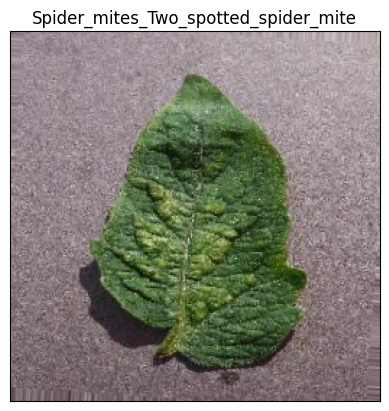

In [88]:
for image_batch, label_batch in train_generator:
  print(image_batch.shape)

  plt.imshow(image_batch[0])
  plt.xticks([]) # disabling xticks by Setting xticks to an empty list
  plt.yticks([]) # disabling yticks by setting yticks to an empty list
  plt.title(label[int(label_batch[0])])


  break

In [108]:
model = models.Sequential([
 layers.InputLayer(input_shape=(img_height, img_width, channels)),
 layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(n_classes, activation='softmax')
])

In [109]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 30, 30, 64)      

In [110]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

model.compile(
    optimizer='adam',
    loss = loss,
    metrics = ['accuracy']
)

In [111]:
nb_epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs,
    verbose=1)

Epoch 1/10
400/400 [==============================] - 407s 1s/step - loss: 1.5794 - accuracy: 0.4331 - val_loss: 1.1695 - val_accuracy: 0.5906
Epoch 2/10
400/400 [==============================] - 413s 1s/step - loss: 0.8279 - accuracy: 0.7133 - val_loss: 0.6451 - val_accuracy: 0.7787
Epoch 3/10
400/400 [==============================] - 397s 992ms/step - loss: 0.5388 - accuracy: 0.8171 - val_loss: 0.4152 - val_accuracy: 0.8564
Epoch 4/10
400/400 [==============================] - 404s 1s/step - loss: 0.4142 - accuracy: 0.8591 - val_loss: 0.4146 - val_accuracy: 0.8551
Epoch 5/10
400/400 [==============================] - 391s 977ms/step - loss: 0.3296 - accuracy: 0.8860 - val_loss: 0.3361 - val_accuracy: 0.8829
Epoch 6/10
400/400 [==============================] - 393s 981ms/step - loss: 0.2914 - accuracy: 0.8986 - val_loss: 0.3579 - val_accuracy: 0.8699
Epoch 7/10
400/400 [==============================] - 396s 991ms/step - loss: 0.2386 - accuracy: 0.9189 - val_loss: 0.2234 - val_accu

In [113]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 400}

In [115]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

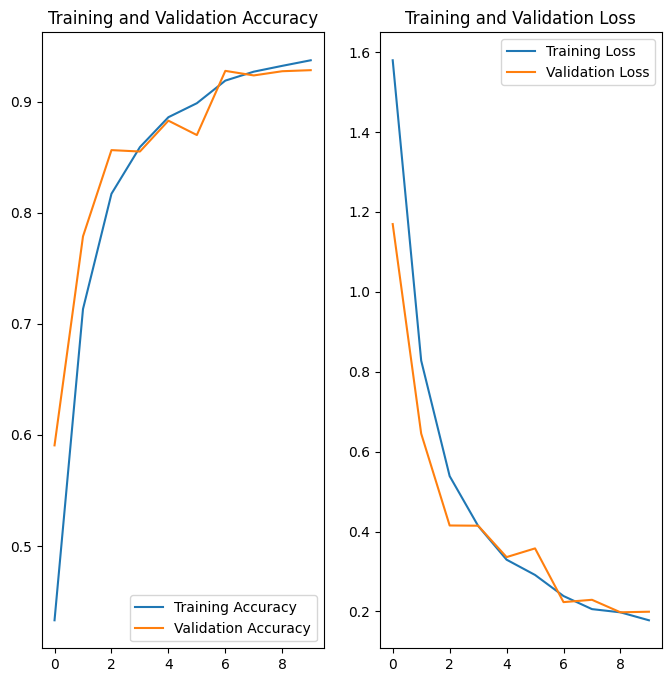

In [116]:
EPOCHS = nb_epochs

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

(32, 256, 256, 3)


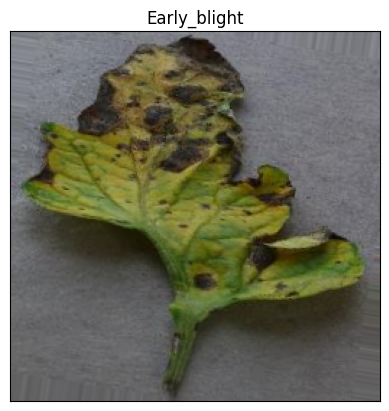

In [120]:
for image_batch, label_batch in validation_generator:
  print(image_batch.shape)

  plt.imshow(image_batch[0])
  plt.xticks([]) # disabling xticks by Setting xticks to an empty list
  plt.yticks([]) # disabling yticks by setting yticks to an empty list
  plt.title(label[int(label_batch[0])])


  break


first image to predict
actual label: Tomato_mosaic_virus
1/1 [==============================] - 0s 192ms/step
predicted label: Tomato_mosaic_virus


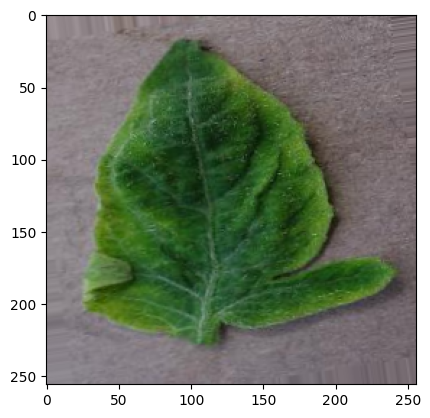

In [124]:
for image_batch, label_batch in validation_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",label[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",label[np.argmax(batch_prediction[0])])

    break

In [128]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = label[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


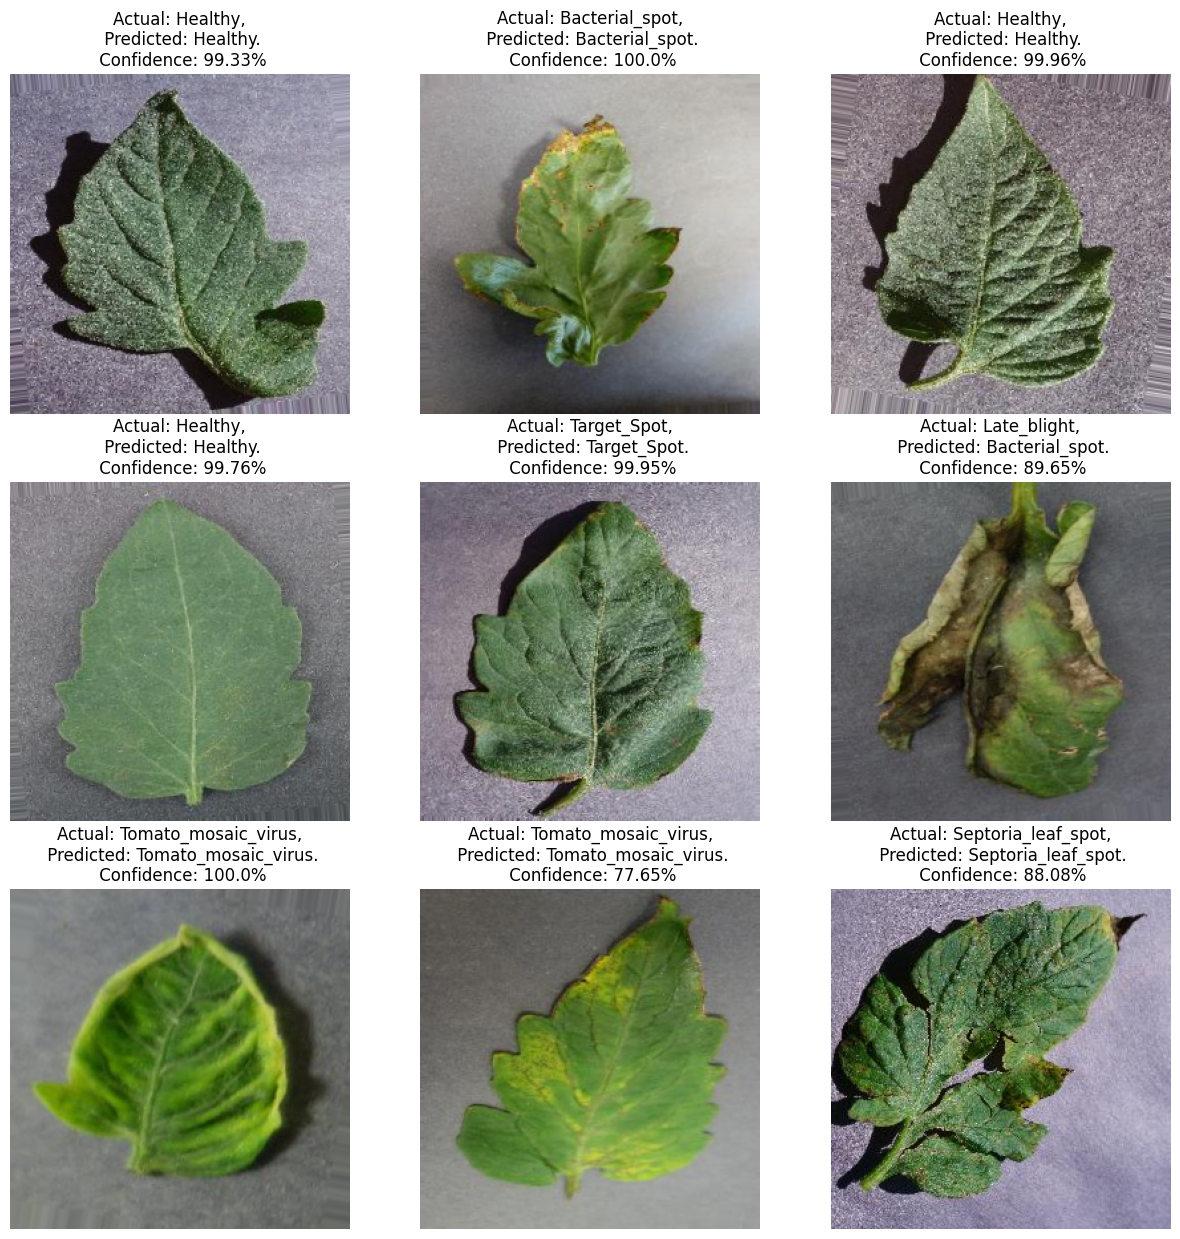

In [129]:
plt.figure(figsize=(15, 15))
for images, labels in validation_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = label[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [130]:
model.save(train_data_dir+'\\tomato_model.h5')


In [95]:
new_model = tf.keras.models.load_model(train_data_dir+'\\tomato_model.h5')

In [96]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 64)      

In [131]:
tf.config.list_physical_devices('GPU')

[]